In [2]:
import pandas as pd

df = pd.read_csv('paint.csv')
df


,Relative humidity (%),type,Evaporation (% wt)
0,35.3,1,11.2
1,29.6,1,11.0
2,31.0,1,12.6
3,58.0,1,8.3
4,62.0,1,10.1
5,72.1,1,9.6
6,74.0,1,6.5
7,77.0,1,8.7
8,71.1,1,8.1
9,57.0,1,9.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Relative humidity (%)  31 non-null     float64
 1   type                   31 non-null     int64  
 2   Evaporation (% wt)     31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 876.0 bytes


In [4]:
df.describe()

,Relative humidity (%),type,Evaporation (% wt)
count,31.000000,31.000000,31.000000
mean,52.470968,0.516129,8.045161
std,16.479972,0.508001,2.453547
min,28.000000,0.000000,4.000000
25%,37.200000,0.000000,6.000000
50%,56.000000,1.000000,8.000000
75%,70.000000,1.000000,9.300000
max,77.000000,1.000000,13.000000


In [ ]:
df.describe().T # Transponerad

,count,mean,std,min,25%,50%,75%,max
Relative humidity (%),31.0,52.470968,16.479972,28.0,37.2,56.0,70.0,77.0
type,31.0,0.516129,0.508001,0.0,0.0,1.0,1.0,1.0
Evaporation (% wt),31.0,8.045161,2.453547,4.0,6.0,8.0,9.3,13.0


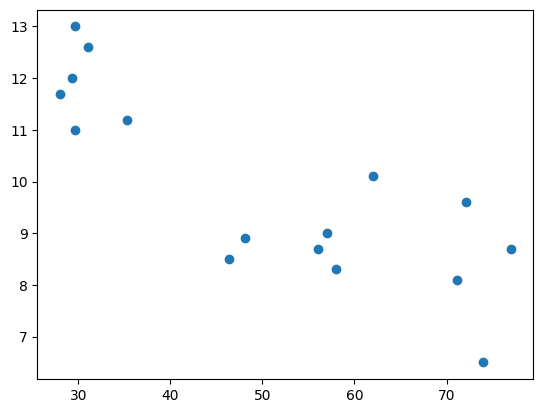

In [11]:
import matplotlib.pyplot as plt

splitA = df[df["type"] == 1]
splitB = df[df["type"] == 2]

X_A = splitA["Relative humidity (%)"]
X_B = splitB["Relative humidity (%)"]
Y_A = splitA["Evaporation (% wt)"]
Y_B = splitB["Evaporation (% wt)"]
plt.scatter(X_A, Y_A)
plt.scatter(X_B, Y_B)

<Axes: xlabel='Relative humidity (%)', ylabel='Evaporation (% wt)'>

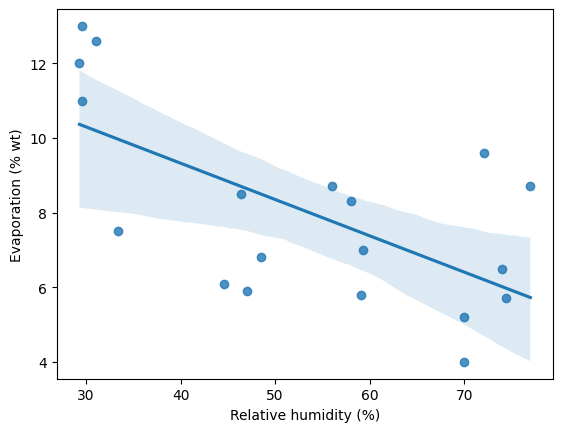

In [12]:
import seaborn as sns

val = df.sample(frac=0.4, random_state=42, replace=False)
df = df.drop(val.index)

Y = df["Evaporation (% wt)"]
X = df["Relative humidity (%)"]

df.insert(0, "Intercept", 1)

sns.regplot(x = X, y = Y)

In [13]:
import numpy as np

X = df.drop("Evaporation (% wt)", axis="columns")
b = np.linalg.pinv(X.T @ X) @ X.T @ Y

In [ ]:
modA = np.append(b[0] + b[2], b[1:2])
modB = b[0:2]
X = X to numpy  
Xr = X[:, 0:2]
print(Xr)
x = Xr[:, 1:2]
plt.scatter(x, Y)
plt.plot(x, Xr @ modA)
plt.plot(x, Xr @ modB)
print(x)

InvalidIndexError: (slice(None, None, None), slice(0, 2, None))